# SVD Image Compression

This will be a very short tutorial on the basics of image compression via singular value decomposition.

First, get all the libraries needed and then define functions to read and plot photos (compressed and non-compressed).

In [19]:
# LIBRARIES:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from numpy.linalg import svd
import numpy as np
import math

# reads the image and plots its original #
def plotOriginal(img_name):
    img = mpimg.imread(img_name)
    plt.subplot(1,2,1)
    plt.imshow(img)
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)
    plt.title("Original Image")
    plt.show()
    return img

# plots the compressed image
def plotSmall(smallImg,percent):
	import matplotlib.pyplot as plt
	plt.subplot(1,2,2)
	plt.imshow(smallImg)
	percent=str(100-percent)
	plt.title(percent+"% Reduction in SV's")
	cur_axes = plt.gca()
	cur_axes.axes.get_xaxis().set_visible(False)
	cur_axes.axes.get_yaxis().set_visible(False)
	plt.show()
    

This next function is the function that will actually perform image compression on a colored image via svd and return the compressed image. 

In [5]:
def compressImage(img,percent): 
	# Initializes the RGB arrays #
	imgR=[[0 for i in range(len(img[0]))] for i in range(len(img))]
	imgG=[[0 for i in range(len(img[0]))] for i in range(len(img))]
	imgB=[[0 for i in range(len(img[0]))] for i in range(len(img))]

	# makes the RGB arrays #
	for i in range(len(img)):
		for j in range(len(img[0])):
			imgR[i][j]=img[i][j][0]
			imgG[i][j]=img[i][j][1]
			imgB[i][j]=img[i][j][2]

	# singular value decompositions #
	redU,reds,redV=svd(imgR)
	greenU,greens,greenV=svd(imgG)
	blueU,blues,blueV=svd(imgB)

	# makes the singular matrix zeros #
	redS = np.zeros((len(redU),len(redV)))
	greenS = np.zeros((len(greenU),len(greenV)))
	blueS = np.zeros((len(blueU),len(blueV)))

	# sticks in singular values #
	redS[:len(redV), :len(redV)] = np.diag(reds)
	greenS[:len(greenV), :len(greenV)] = np.diag(greens)
	blueS[:len(blueV), :len(blueV)] = np.diag(blues)

	# rank of the matrix
	singularNum=math.floor(len(redS)*percent/100)

	# zero out the singular values that are not needed # 
	for i in range(singularNum,len(redV)):
		redS[i][i]=0;
		greenS[i][i]=0;
		blueS[i][i]=0;

	smallImgB=np.dot(np.dot(blueU,blueS),blueV)	# reconstruct the new images
	smallImgR=np.dot(np.dot(redU,redS),redV)
	smallImgG=np.dot(np.dot(greenU,greenS),greenV)


	# construct the new image with the singular value number #
	smallImg=img
	for i in range(len(img)):
		for j in range(len(img[0])):
			smallImg[i][j][0]=smallImgR[i][j]
			smallImg[i][j][1]=smallImgG[i][j]
			smallImg[i][j][2]=smallImgB[i][j]

	# correct for values that might be too high or too low # 
	for i in range(len(img)):
		for j in range(len(img[0])):
			for k in range(len(img[0][0])):
				if smallImg[i][j][k]>1:
					smallImg[i][j][k]=1
				if smallImg[i][j][k]<0:
					smallImg[i][j][k]=0
	return smallImg

Now lets test the compression to see if it is working.

<IPython.core.display.Javascript object>


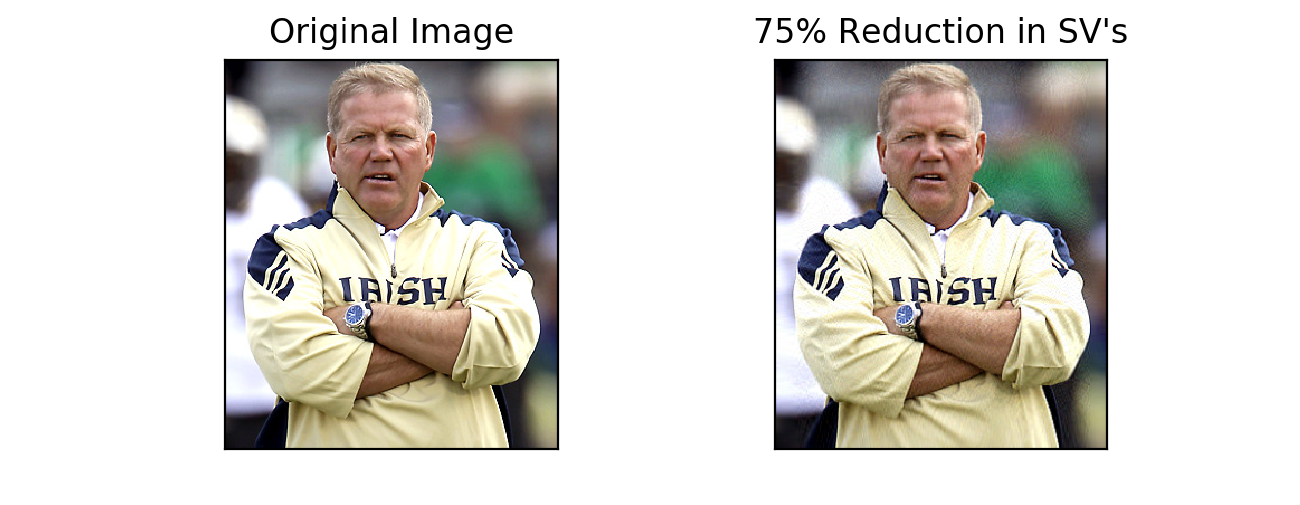

In [21]:
%matplotlib notebook
name = 'picture.png'
percent = 25
img = plotOriginal(name)
new_img = compressImage(img,percent)
plotSmall(new_img,percent)
